In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import kaepora as kpora
import kaepora_plot as kplot
import matplotlib.pyplot as plt
import copy
import numpy as np

In [4]:
example_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
              " phase >= -6 and phase <= -4 and ((dm15_source between .5 and 1.8) or (dm15_from_fits between .5 and 1.8))"]

In [5]:
spec_array = kpora.grab(example_query[0], verbose=True, db_file = '../data/kaepora_v1.2.db')
copy_array = copy.deepcopy(spec_array)

ERROR:  sn2006oa-20061122-not.dat None
ERROR:  sn2007jg-20070918-not.dat None
167 Total Spectra found
167 spectra of SNe that have host reddening corrections
Arrays cleaned
Name Filename Source SNR Phase MJD MJD_max z Host Morphology Minwave Maxwave
1994d sn1994d-19940316.flm bsnip 203.90915657386088 -5.574527622156571 49427.0 0.002058 8.0 3286.0 7214.0
1994d sn1994d-19940317.flm bsnip 279.03758596099834 -4.118524077449018 49428.459 0.002058 8.0 3166.0 9828.0
1995ac sn1995ac-19950926-uoi.flm bsnip 17.818872291849274 -5.848265090872368 49986.406 0.050055 10.0 3100.0 9900.0
1997br sn1997br-19970416-uoi.flm bsnip 171.3237064153759 -4.418660365560601 50554.43 0.005961 16.0 3194.0 10356.0
1997do sn1997do-19971108-uoi.flm bsnip 151.72097743197182 -5.8052508612779885 50760.48 0.01012 13.0 3290.0 10344.0
1998dm sn1998dm-19980831-ui-corrected.flm bsnip 266.82544507498267 -4.865205879574189 51056.423 0.006535 14.0 3332.0 10082.0
2000cx sn2000cx-20000723-nickel.flm bsnip 135.8927831655713 -4.8556

In [21]:
print (spec_array[0].event_data.keys())

dict_keys(['SN', 'RA', 'DEC', 'zCMB_salt', 'e_zCMB_salt', 'Bmag_salt', 'e_Bmag_salt', 's_salt', 'e_s_salt', 'c_salt', 'e_c_salt', 'mu_salt', 'e_mu_salt', 'zCMB_salt2', 'e_zCMB_salt2', 'Bmag_salt2', 'e_Bmag_salt2', 'x1_salt2', 'e_x1_salt2', 'c_salt2', 'e_c_salt2', 'mu_salt2', 'e_mu_salt2', 'zCMB_mlcs31', 'e_zCMB_mlcs31', 'mu_mlcs31', 'e_mu_mlcs31', 'delta_mlcs31', 'e_delta_mlcs31', 'av_mlcs31', 'e_av_mlcs31', 'zCMB_mlcs17', 'e_zCMB_mlcs17', 'mu_mlcs17', 'e_mu_mlcs17', 'delta_mlcs17', 'e_delta_mlcs17', 'av_mlcs17', 'e_av_mlcs17', 'glon_host', 'glat_host', 'cz_host', 'czLG_host', 'czCMB_host', 'mtype_host', 'xpos_host', 'ypos_host', 't1_host', 'filt_host', 'Ebv_host', 'zCMB_lc', 'zhel_lc', 'mb_lc', 'e_mb_lc', 'c_lc', 'e_c_lc', 'x1_lc', 'e_x1_lc', 'logMst_lc', 'e_logMst_lc', 'tmax_lc', 'e_tmax_lc', 'cov_mb_s_lc', 'cov_mb_c_lc', 'cov_s_c_lc', 'bias_lc', 'Av_MW', 'Av_25', 'MJD_max', 'Dm15_source', 'Dm15_from_fits', 'e_dm15', 'separation', 'NED_host', 'V_at_max', 'V_err', 'Redshift', 'M_b_cfa

In [22]:
spec_array_dered = kpora.host_dereddening(copy_array, verbose=False, cutoff=2.)

In [25]:
for i,spec in enumerate(spec_array_dered):
    print (i, spec.name, spec.filename, spec.source, spec.phase, spec.wavelength[spec.x1], spec.wavelength[spec.x2])

0 1994d sn1994d-19940316.flm bsnip -5.574527622156571 3286.0 7214.0
1 1994d sn1994d-19940317.flm bsnip -4.118524077449018 3166.0 9828.0
2 1995ac sn1995ac-19950926-uoi.flm bsnip -5.848265090872368 3100.0 9900.0
3 1997br sn1997br-19970416-uoi.flm bsnip -4.418660365560601 3194.0 10356.0
4 1997do sn1997do-19971108-uoi.flm bsnip -5.8052508612779885 3290.0 10344.0
5 1998dm sn1998dm-19980831-ui-corrected.flm bsnip -4.865205879574189 3332.0 10082.0
6 2000cx sn2000cx-20000723-nickel.flm bsnip -4.8556690804451925 3854.0 7290.0
7 2001ba sn2001ba-20010430-ui.flm bsnip -5.12550543583489 3220.0 10244.0
8 2001eh sn2001eh-20010912-ui.flm bsnip -5.193648050796576 3236.0 9978.0
9 2002er sn2002er-20020903-ui-corrected.flm bsnip -4.776073823409936 3154.0 10260.0
10 2002hu sn2002hu-20021108-br.flm bsnip -5.771844660193892 3050.0 9094.0
11 2002hw sn2002hw-20021111-br.flm bsnip -5.988983179937125 3094.0 9194.0
12 2003w sn2003W-20030204-ui.flm bsnip -5.354529243552198 3094.0 10144.0
13 2004as sn2004as-2004031

sn2007af-20070310.46-fast.flm sn2007af-20070310.46-fast.flm


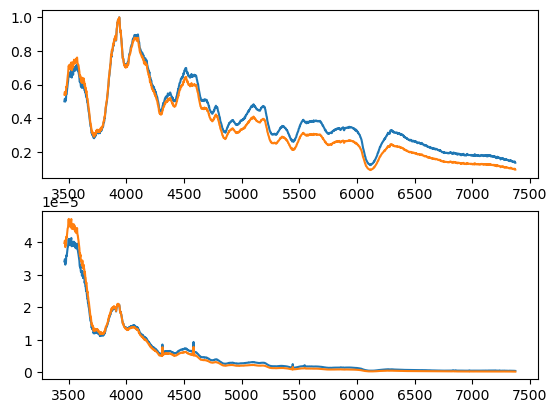

In [30]:
fig, ax = plt.subplots(2,1)
for spec in spec_array:
    if spec.filename == 'sn2007af-20070310.46-fast.flm':
        for spec_dered in spec_array_dered:
            if spec_dered.filename == 'sn2007af-20070310.46-fast.flm':
                print (spec.filename, spec_dered.filename)
                ax[0].plot(spec.wavelength, spec.flux)
                ax[1].plot(spec.wavelength, 1/spec.ivar)
                ax[0].plot(spec_dered.wavelength, spec_dered.flux)
                ax[1].plot(spec_dered.wavelength, 1/spec_dered.ivar)
                plt.show()

In [33]:
spec_attributes = dir(spec_array[0])
print (len(spec_array))
for att in spec_attributes:
    print (att)

167
SNR
__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__slotnames__
__str__
__subclasshook__
__weakref__
av_25
av_mlcs17
av_mlcs31
c_array
dm15
dm15_array
event_data
filename
flux
hr_array
interp
ivar
low_conf
maxwave
minwave
mjd
morph_array
name
other_spectral_data
phase
phase_array
red_array
ref
shape_param
source
spec_bin
up_conf
vel
wavelength
x1
x2


In [35]:
ex_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
              " phase >= -6 and phase <= -4 and ((dm15_source between .5 and 1.8) or (dm15_from_fits between .5 and 1.8))"]
composites, sn_arrays, og_SN_Arrays, boot_sn_arrays = kpora.make_composite(ex_query, db_file = '../data/kaepora_v1.2.db', shape_param='dm15', boot=False, make_corr=True, av_corr=True, medmean=1, 
                                                             verbose=False, gini_balance=True, combine=True, scale_region=[4000,9000], get_og_arr = True)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -6 and phase <= -4 and ((dm15_source between .5 and 1.8) or (dm15_from_fits between .5 and 1.8))
ERROR:  sn2006oa-20061122-not.dat None
ERROR:  sn2007jg-20070918-not.dat None
167 Total Spectra found
4 flagged spectra removed 163 spectra left
5 spectra of peculiar Ias removed 158 spectra left
133 spectra of SNe that have host reddening corrections
Arrays cleaned
133 spectra may have telluric contamination
75 total SNe
removed spectra of SNe with A_V > 2.0
Using 129 spectra of 72 SNe
Gini balancing...
Balanced after 20 iterations


In [36]:
# plt.figure(figsize = [15,8])
# for b in boot_sn_arrays[0]:
#     plt.plot(b.wavelength, b.flux, 'g')
# plt.plot(composites[0].wavelength, composites[0].flux, 'k')
# plt.show()

Phase:  -5.094445713211568
dm15:  1.115652264446508
Redshift:  0.015824740325995502
HR:  1.1368667907873222


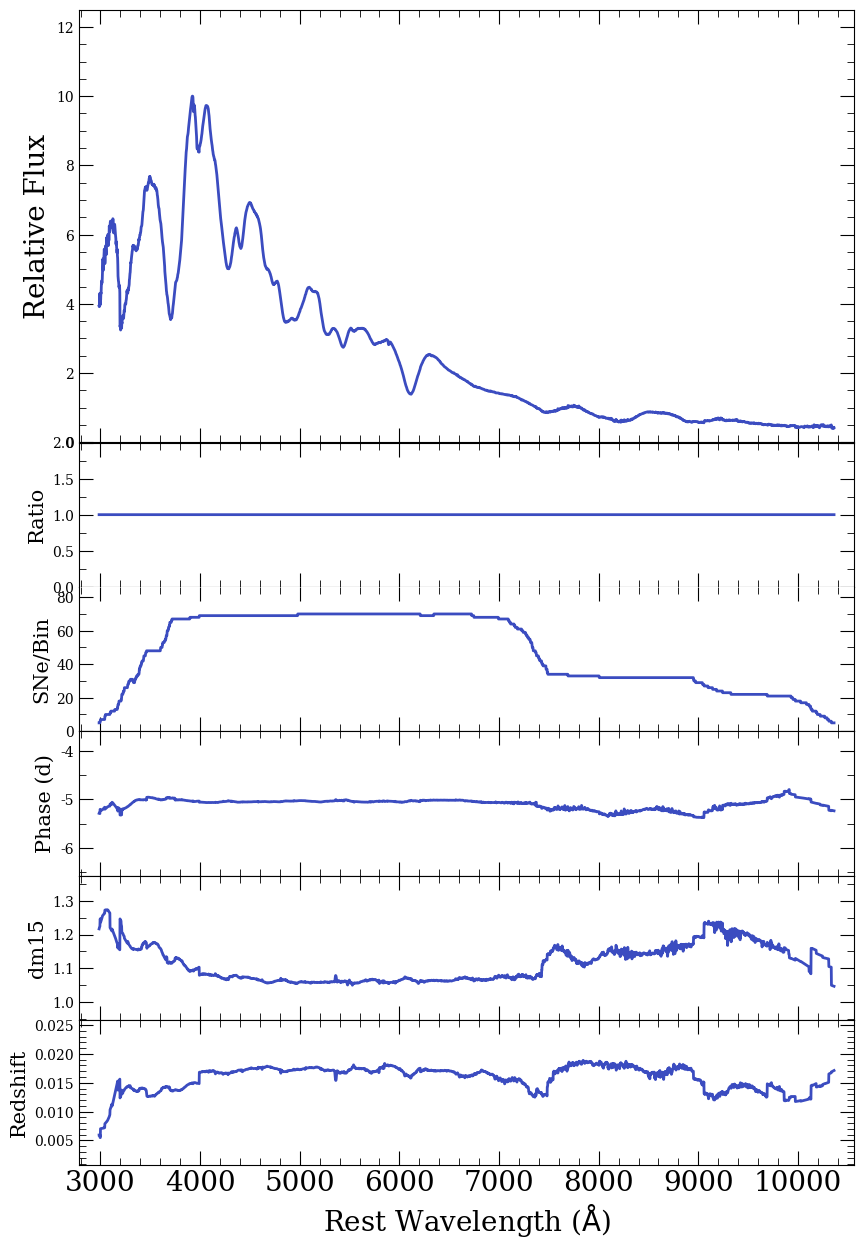

In [37]:
kpora.set_min_num_spec(composites, 5)
kplot.comparison_plot(composites, scale_type=False, min_num_show=5)

1992a


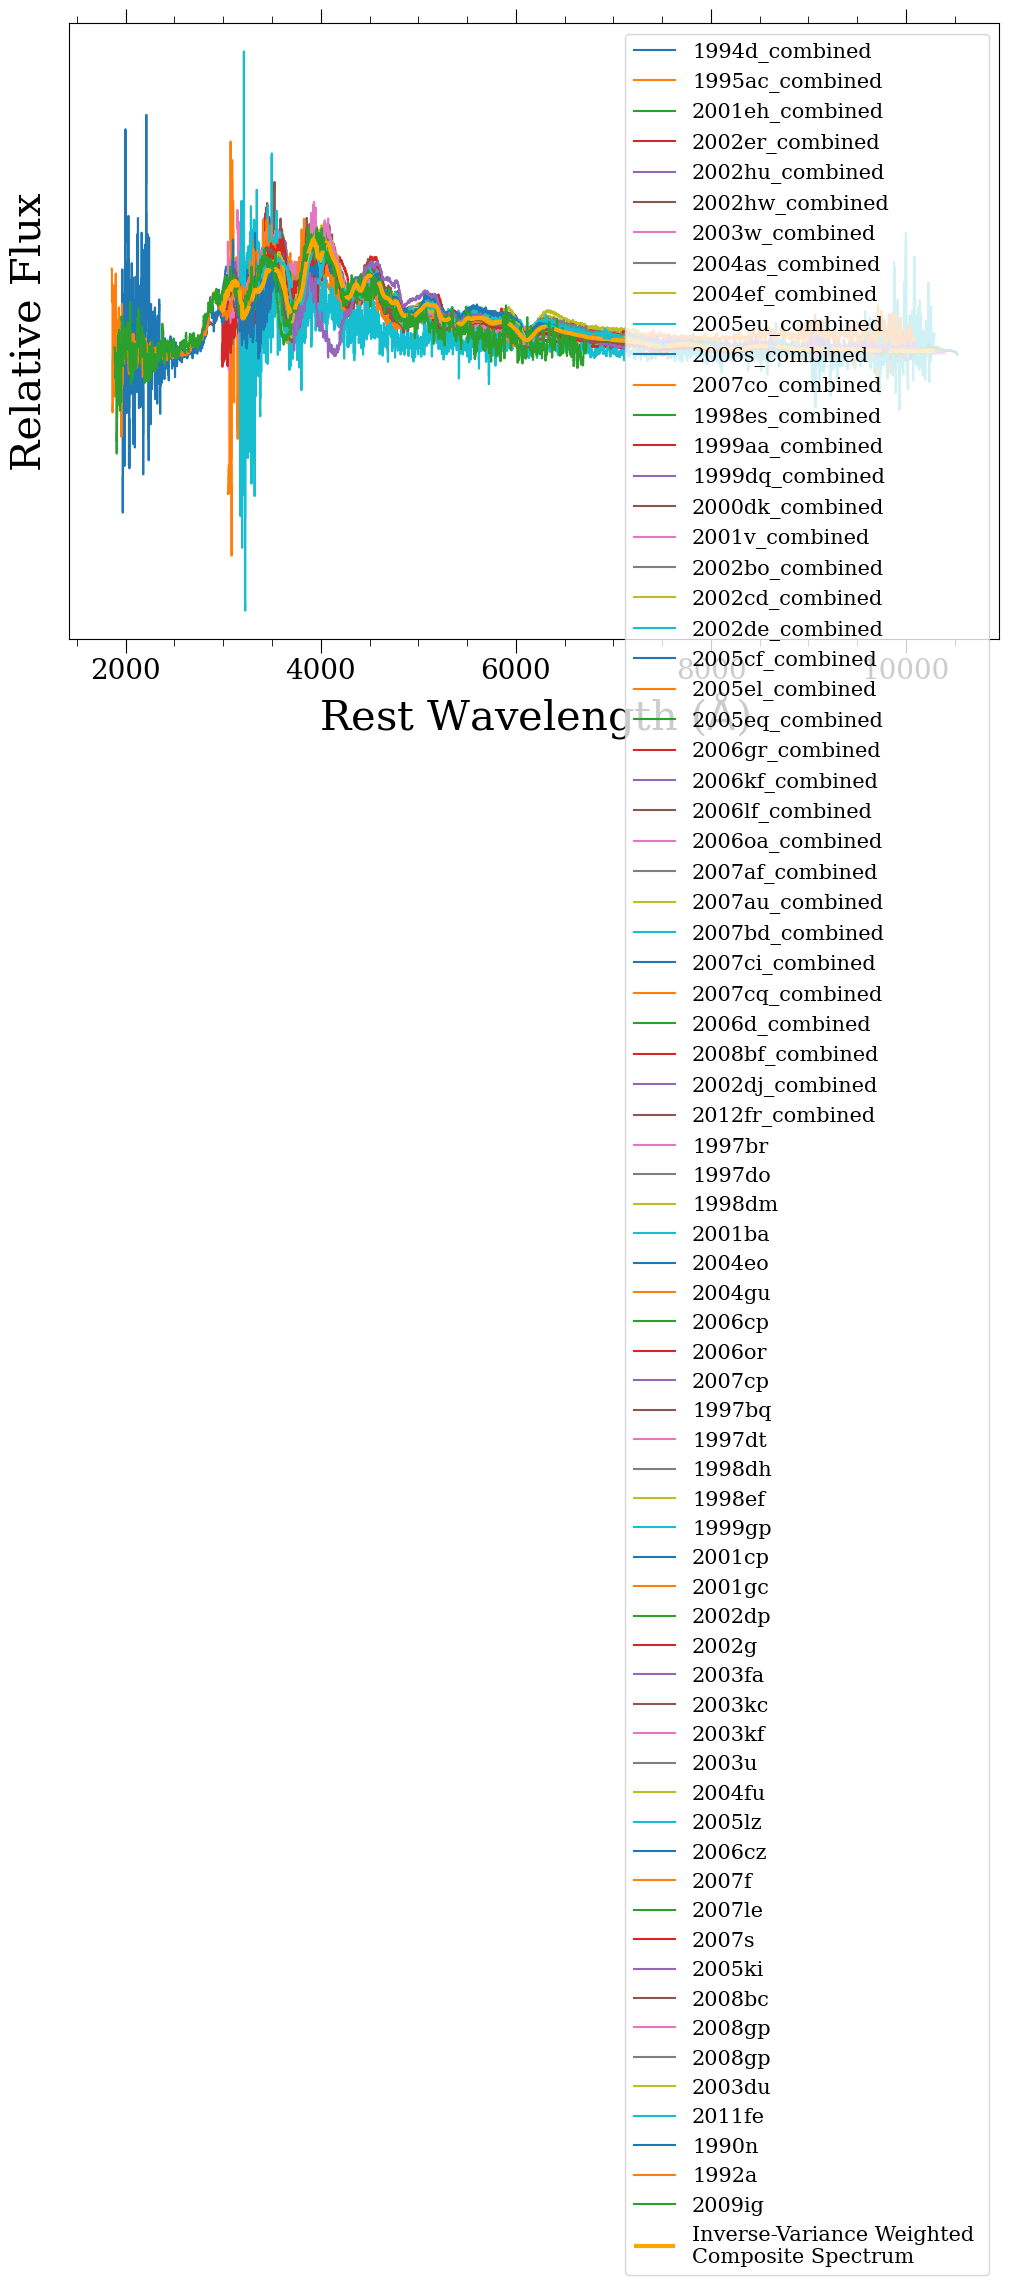

In [38]:
kplot.plot_comp_and_all_spectra(composites[0], sn_arrays[0],show_ivar=False, dm15=True)

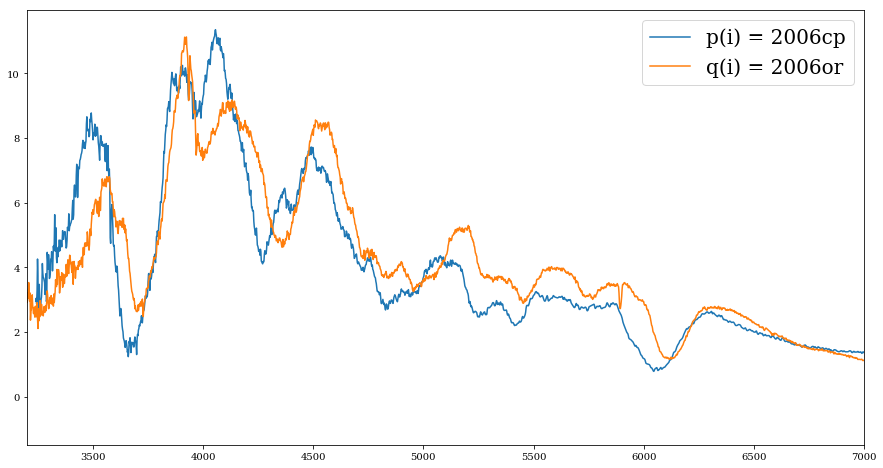

In [167]:
# names = ['p(i)', 'q(i)']
# i=0
# plt.figure(figsize=[15,8])
# for sn in sn_arrays[0]:
#     if sn.name == '2006cp' or sn.name == '2006or':
        
#         plt.plot(sn.wavelength, sn.flux, label = names[i] + ' = '+ sn.name)
#         plt.legend(fontsize=20)
#         plt.xlim(3200, 7000)
#         i+=1
# plt.show()